# Datasets

## the `iris` dataset

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## The `breast_cancer` dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

(section-dataset-horsecolic)=
## the Horse Colic Dataset
The data is from the [UCI database](https://archive.ics.uci.edu/ml/datasets/Horse+Colic). The data is loaded as follows. `?` represents missing data.

In [51]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

The description of the data is listed [here](https://archive.ics.uci.edu/ml/datasets/Horse+Colic). We will preprocess the data according to the descrption.

1. The data tries to predict Column 24. Since Python index starts from 0, in our case we are interested in Column 23.
2. Column 25-27 (in our case is Column 24-26) use a special code to represent the type of lesion. For simplicity we remove these three columns.
3. Column 28 (in our case Column 27) is of no significance so we will remove it too.
4. Column 3 (in our case Column 2) is the IDs of Hospitals which should have very little impact so we will remove it too.
5. We will fill the missing values with `0`.
6. We also would like to change the label from `1` and `2` to `0` and `1` for the purpose of Logistic regression.

*This part should be modified if you want to improve the performance of your model.*

In [52]:
df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


## the Dating dataset
The data file can be downloaded from {Download}`here<./assests/datasets/datingTestSet2.txt>`. 

```{code-block} python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('datingTestSet2.txt', sep='\t', header=None)
X = np.array(df[[0, 1, 2]])
y = np.array(df[3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
```



## The dataset randomly generated
- `make_moon` dataset

This is used to generate two interleaving half circles.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

- `make_gaussian_quantiles` dataset

This is a generated isotropic Gaussian and label samples by quantile. 

The following code are from [this page](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py). It is used to generate a relative complex dataset by combining two datesets together.

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X1, y1 = make_gaussian_quantiles(cov=2.0, n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300,
                                 n_features=2, n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

It can also be used to generate multiclass dataset.

In [28]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X, y = make_gaussian_quantiles(cov=2.0, n_samples=200, n_features=2,
                               n_classes=4, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

- `make_classification`
  
This will create a multiclass dataset. Without shuffling, `X` horizontally stacks features in the following order: the primary `n_informative` features, followed by `n_redundant` linear combinations of the informative features, followed by `n_repeated` duplicates, drawn randomly with replacement from the informative and redundant features. 

For more details please see the [official document](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification).

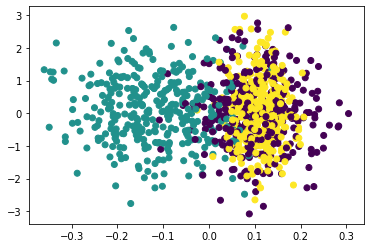

In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


## `MNIST` dataset

There are several versions of the dataset. 

- `tensorflow` provides the data with the original split.

In [ ]:
import tensorflow.keras as keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## `titanic` dataset
This is the famuous Kaggle101 dataset. The original data can be download from [the Kaggle page](https://www.kaggle.com/competitions/titanic/data). You may also download the {Download}`training data<./assests/datasets/titanic/train.csv>` and the {Download}`test data<./assests/datasets/titanic/test.csv>` by click the link.

```{code-block} python
import pandas as pd
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')
```


In [1]:
import pandas as pd
dftrain = pd.read_csv('assests/datasets/titanic/train.csv')
dftest = pd.read_csv('assests/datasets/titanic/test.csv')

The original is a little bit messy with missing values and mix of numeric data and string data. The above code reads the data into a DataFrame. The following code does some basic of preprocess. This part should be modified if you want to improve the performance of your model.

1. Only select columns: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`. That is to say, `Name`, `Cabin` and `Embarked` are dropped.
2. Fill the missing values in column `Age` and `Fare` by `0`.
3. Replace the column `Sex` by the following map: `{'male': 0, 'female': 1}`.

In [2]:
import pandas as pd
import numpy as np

def getnp(df):
    df['mapSex'] = df['Sex'].map(lambda x: {'male': 0, 'female': 1}[x])
    dfx = df[['Pclass', 'mapSex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
    dfx['Fare'].fillna(0, inplace=True)
    dfx['Age'].fillna(0, inplace=True)
    if 'Survived' in df.columns:
        y = df['Survived'].to_numpy()
    else:
        y = None
    X = dfx.to_numpy()
    return (X, y)

X_train, y_train = getnp(dftrain)
X_test, _ = getnp(dftest)

For the purpose of submitting to Kaggle, after getting `y_pred`, we could use the following file to prepare for the submission file.

```{code-block} python
def getdf(df, y):
    df['Survived'] = y
    return df[['PassengerId', 'Survived']]

getdf(dftest, y_pred).to_csv('result.csv')
```


## Plant survival data with salt and microbe treatments

This dataset is supported by DART SEED grant. It is provided by Dr. Suresh Subedi from ATU. The dataset is about the outcomes of certain treatments applied to plants. We would like to predict whether the plants survive based on the status of the plants and the treatments. The datafile can be downloaded from {Download}`here<assests/datasets/plants.xlsx>`.

We could use the following code to read the data.

In [1]:
import pandas as pd

df = pd.read_excel('assests/datasets/plants.xlsx', engine='openpyxl', sheet_name='data')

There are a few missing values. The missing values in `Outcome_after 12 months` are all `dead`. These are not recorded as `dead` because the cause of the death is more complicated and needs to be studied separatedly. In our case we could simply fill it with `dead`.

There are two more missing values in `Stem diameter`. For simplicity we drop them directly.

In [2]:
df['Outcome_after 12 months'].fillna('dead', inplace=True)
df = df.dropna()

Then we would like to transform the data. Here are the rules. 

- `Endophyte`: `I+`->`1`, `I-`->`-1`
- `Treatment`: `Salt`->`1`, `Fresh`->`0`
- `Tree_Replicate`: `T1`->`1`, `T2`->`2`, `T3`->`3`
- `Outcome_after 12 months`: `survived`->`1`, `dead`->0

Column `SN` will be dropped. 

Finally we put these together to get the features `X` and the label `y`.

In [12]:
df['Endophyte '] = df['Endophyte '].map({'I+': 1, 'I-': -1})
df['Treatment'] = df['Treatment'].map({'Fresh': 0, 'Salt': 1})
df['Tree_Replicate'] = df['Tree_Replicate'].str[1].astype(int)
df['Outcome_after 12 months'] = df['Outcome_after 12 months'].map({'survived': 1, 'dead': 0})

X = df.iloc[:, 1: -1].to_numpy()
y = df['Outcome_after 12 months'].to_numpy()